<a href="https://colab.research.google.com/github/ianchaulh/crypto-api-usage-2/blob/main/alternativemeAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# alternative.me

> ⚠️ fetehed from https://alternative.me/crypto/fear-and-greed-index/#api

* Data Sources

  We are gathering data from the five following sources. Each data point is valued the same as the day before in order to visualize a meaningful progress in sentiment change of the crypto market.

  First of all, the current index is for bitcoin only (we offer separate indices for large alt coins soon), because a big part of it is the volatility of the coin price.

  But let’s list all the different factors we’re including in the current index:

* Volatility (25 %)

  We’re measuring the current volatility and max. drawdowns of bitcoin and compare it with the corresponding average values of the last 30 days and 90 days. We argue that an unusual rise in volatility is a sign of a fearful market.

* Market Momentum/Volume (25%)

  Also, we’re measuring the current volume and market momentum (again in comparison with the last 30/90 day average values) and put those two values together. Generally, when we see high buying volumes in a positive market on a daily basis, we conclude that the market acts overly greedy / too bullish.

* Social Media (15%)

  While our reddit sentiment analysis is still not in the live index (we’re still experimenting some market-related key words in the text processing algorithm), our twitter analysis is running. There, we gather and count posts on various hashtags for each coin (publicly, we show only those for Bitcoin) and check how fast and how many interactions they receive in certain time frames). A unusual high interaction rate results in a grown public interest in the coin and in our eyes, corresponds to a greedy market behaviour.

* Surveys (15%) currently paused

  Together with strawpoll.com (disclaimer: we own this site, too), quite a large public polling platform, we’re conducting weekly crypto polls and ask people how they see the market. Usually, we’re seeing 2,000 - 3,000 votes on each poll, so we do get a picture of the sentiment of a group of crypto investors. We don’t give those results too much attention, but it was quite useful in the beginning of our studies. You can see some recent results here.

* Dominance (10%)

  The dominance of a coin resembles the market cap share of the whole crypto market. Especially for Bitcoin, we think that a rise in Bitcoin dominance is caused by a fear of (and thus a reduction of) too speculative alt-coin investments, since Bitcoin is becoming more and more the safe haven of crypto. On the other side, when Bitcoin dominance shrinks, people are getting more greedy by investing in more risky alt-coins, dreaming of their chance in next big bull run. Anyhow, analyzing the dominance for a coin other than Bitcoin, you could argue the other way round, since more interest in an alt-coin may conclude a bullish/greedy behaviour for that specific coin.

* Trends (10%)

  We pull Google Trends data for various Bitcoin related search queries and crunch those numbers, especially the change of search volumes as well as recommended other currently popular searches. For example, if you check Google Trends for "Bitcoin", you can’t get much information from the search volume. But currently, you can see that there is currently a +1,550% rise of the query „bitcoin price manipulation“ in the box of related search queries (as of 05/29/2018). This is clearly a sign of fear in the market, and we use that for our index.

# Code

In [ ]:
!pip install plotly

In [ ]:
import requests
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/Colab Notebooks/bitcoin_historical_data"

/content/drive/MyDrive/Colab Notebooks/bitcoin_historical_data


In [ ]:
url = "https://api.alternative.me/fng/?limit=3000&start_date=2018-02-01"
response = requests.get(url)
response = response.json()

In [ ]:
fng_data = response['data']
fng_data[0]

{'value': '29',
 'value_classification': 'Fear',
 'timestamp': '1720310400',
 'time_until_update': '23617'}

In [ ]:
fng_df = pd.DataFrame(fng_data, columns=['value', 'value_classification', 'timestamp', 'time_until_update'])
fng_df.head()

,value,value_classification,timestamp,time_until_update
0,29,Fear,1720310400,23617
1,26,Fear,1720224000,NaN
2,29,Fear,1720137600,NaN
3,44,Fear,1720051200,NaN
4,50,Neutral,1719964800,NaN


In [ ]:
fng_df['value'] = fng_df['value'].astype(int)

In [ ]:
fng_df['timestamp_unix'] = fng_df['timestamp']
fng_df

,value,value_classification,timestamp,time_until_update,timestamp_unix
0,29,Fear,1720310400,23617,1720310400
1,26,Fear,1720224000,NaN,1720224000
2,29,Fear,1720137600,NaN,1720137600
3,44,Fear,1720051200,NaN,1720051200
4,50,Neutral,1719964800,NaN,1719964800
...,...,...,...,...,...
2341,11,Extreme Fear,1517788800,NaN,1517788800
2342,24,Extreme Fear,1517702400,NaN,1517702400
2343,40,Fear,1517616000,NaN,1517616000
2344,15,Extreme Fear,1517529600,NaN,1517529600


In [ ]:
fng_df['timestamp'] = pd.to_datetime(fng_df['timestamp_unix'], unit='s')
fng_df

<ipython-input-25-817e54730e4a>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  fng_df['timestamp'] = pd.to_datetime(fng_df['timestamp_unix'], unit='s')


,value,value_classification,timestamp,time_until_update,timestamp_unix
0,29,Fear,2024-07-07,23617,1720310400
1,26,Fear,2024-07-06,NaN,1720224000
2,29,Fear,2024-07-05,NaN,1720137600
3,44,Fear,2024-07-04,NaN,1720051200
4,50,Neutral,2024-07-03,NaN,1719964800
...,...,...,...,...,...
2341,11,Extreme Fear,2018-02-05,NaN,1517788800
2342,24,Extreme Fear,2018-02-04,NaN,1517702400
2343,40,Fear,2018-02-03,NaN,1517616000
2344,15,Extreme Fear,2018-02-02,NaN,1517529600


In [ ]:
fng_df = fng_df[['timestamp_unix', 'timestamp', 'value', 'value_classification']]
fng_df

,timestamp_unix,timestamp,value,value_classification
0,1720310400,2024-07-07,29,Fear
1,1720224000,2024-07-06,26,Fear
2,1720137600,2024-07-05,29,Fear
3,1720051200,2024-07-04,44,Fear
4,1719964800,2024-07-03,50,Neutral
...,...,...,...,...
2341,1517788800,2018-02-05,11,Extreme Fear
2342,1517702400,2018-02-04,24,Extreme Fear
2343,1517616000,2018-02-03,40,Fear
2344,1517529600,2018-02-02,15,Extreme Fear


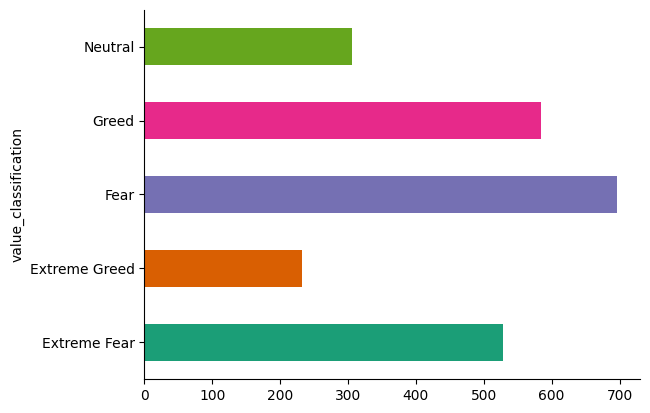

In [ ]:
# @title value_classification

from matplotlib import pyplot as plt
import seaborn as sns
fng_df.groupby('value_classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Create the interactive line plot
fig = go.Figure(data=go.Scatter(x=fng_df['timestamp'], y=fng_df['value']))
fig.update_layout(
    title='Fear & Greed Index',
    xaxis_title='Timestamp',
    yaxis_title='Value',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# Display the plot
fig.show()

In [ ]:
# Create the interactive line plot with range slider and selectors
fig = go.Figure(data=go.Scatter(x=fng_df['timestamp'], y=fng_df['value']))
fig.update_layout(
    title='Fear & Greed Index',
    xaxis_title='Timestamp',
    yaxis_title='Value',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# Display the plot
fig.show()

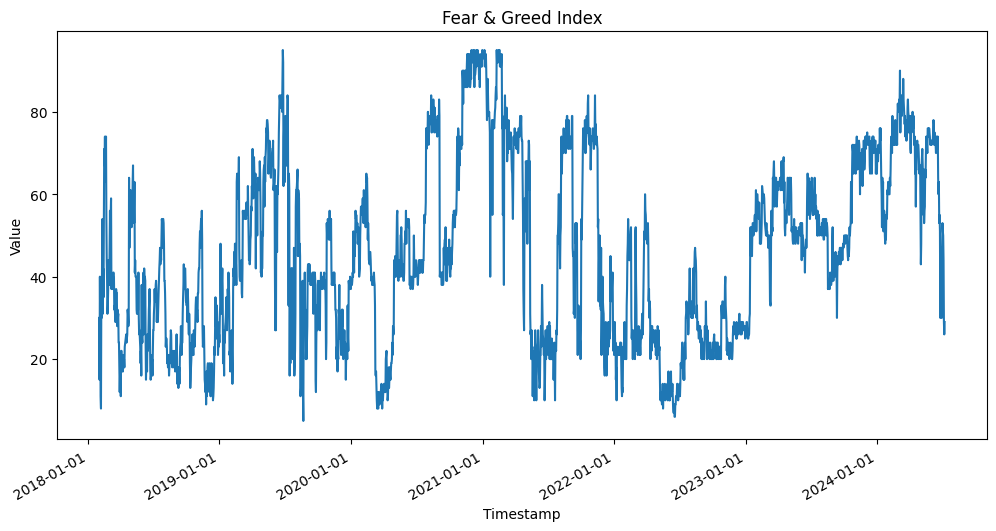

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Fear & Greed Index
ax.plot(fng_df['timestamp'], fng_df['value'])

# Set the title and axis labels
ax.set_title('Fear & Greed Index')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')

# Format the x-axis as dates
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Show the plot
plt.show()

# Export

In [ ]:
fng_df.to_csv('fear_and_greed_index.csv', index=False)

In [ ]:
df_verify = pd.read_csv('fear_and_greed_index.csv') # verifying the export
df_verify.head()

,timestamp_unix,timestamp,value,value_classification
0,1720310400,2024-07-07,29,Fear
1,1720224000,2024-07-06,26,Fear
2,1720137600,2024-07-05,29,Fear
3,1720051200,2024-07-04,44,Fear
4,1719964800,2024-07-03,50,Neutral
